# Visualizacion exploratoria
Visualizar datos categóricos y numéricos usando distintos tipos de gráficos para comprender mejor la estructura y comportamiento de las variables, comparaciones entre grupos y relaciones entre variables.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

df = pd.read_csv('datasets/ventas.csv')
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

### Histograma de ventas

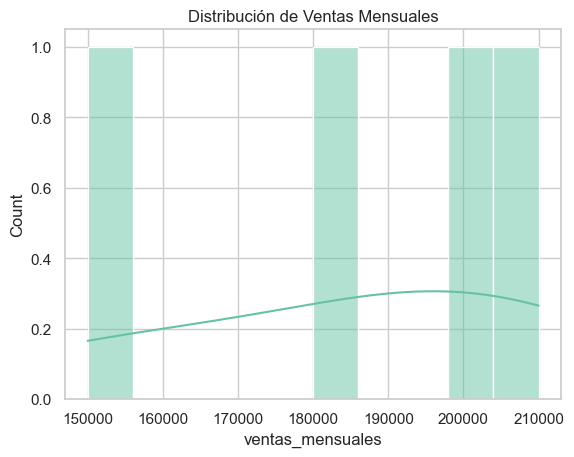

In [19]:
sns.histplot(data=df, x='ventas_mensuales', bins=10, kde=True)
plt.title('Distribución de Ventas Mensuales')
plt.show()

### Comparación entre productos

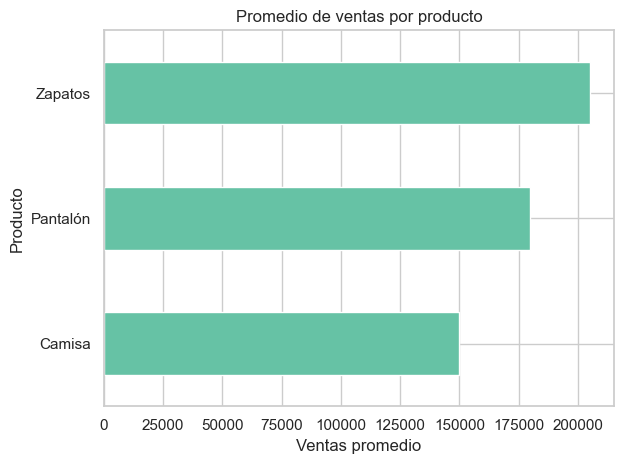

In [25]:
# Gráfico de barras horizontal para comparar ventas por producto:
df.groupby('producto')['ventas_mensuales'].mean().sort_values().plot(kind='barh')
plt.title('Promedio de ventas por producto')
plt.xlabel('Ventas promedio')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

### Boxplot de ventas por categoría

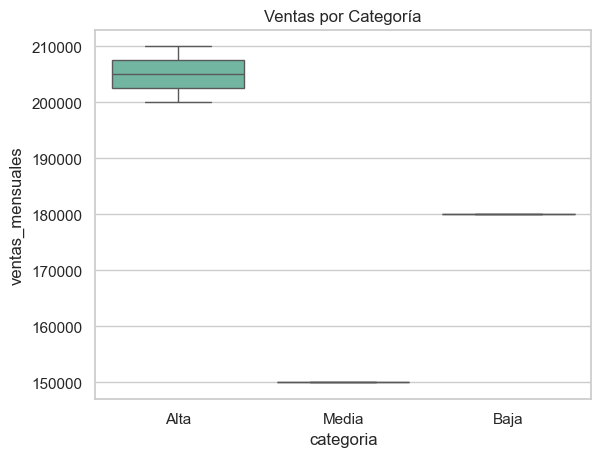

In [20]:
# Asegura que la categoría esté bien mapeada
df['categoria'] = df['categoria'].map({'A': 'Alta', 'B': 'Media', 'C': 'Baja'})
df['categoria'] = df['categoria'].fillna('Desconocida')

sns.boxplot(x='categoria', y='ventas_mensuales', data=df)
plt.title('Ventas por Categoría')
plt.show()


### Gráfico de líneas de ventas por fecha

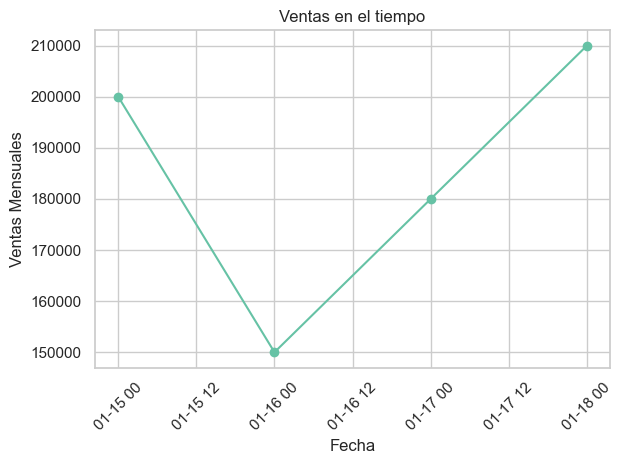

In [21]:
df.sort_values('fecha', inplace=True)
plt.plot(df['fecha'], df['ventas_mensuales'], marker='o')
plt.title('Ventas en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Heatmap de correlación

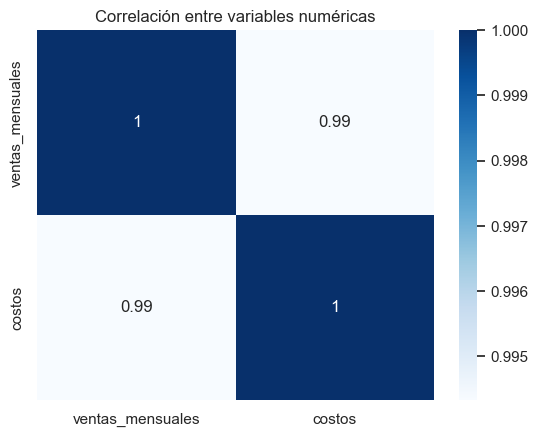

In [22]:
sns.heatmap(df[['ventas_mensuales', 'costos']].corr(), annot=True, cmap='Blues')
plt.title('Correlación entre variables numéricas')
plt.show()

### Scatterplot ventas vs costos

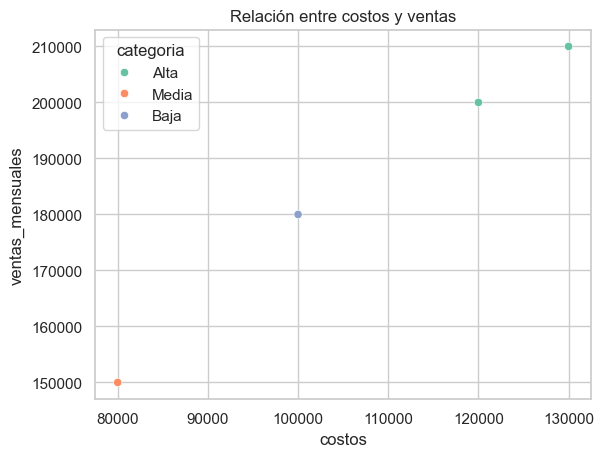

In [23]:
sns.scatterplot(x='costos', y='ventas_mensuales', data=df, hue='categoria')
plt.title('Relación entre costos y ventas')
plt.show()